### Breast Cancer Detection using DenseNet 169 | CBIS-DDSM

##### I. Import Libraries, Loading Data, Define, etc.

In [331]:
import sys
import os
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import PIL 
import random
random.seed(100)
np.random.seed(100)

# Display some images
import matplotlib.image as mpimg

import tensorflow as tf

import cv2

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# Import necessary TensorFlow libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical

import warnings

# Suppress all warnings globally
warnings.filterwarnings("ignore")

In [332]:
# get the current working directory
current_working_directory = os.getcwd()

# print output to the console
print(current_working_directory)

# output will look something similar to this on a macOS system
# /Users/dionysialemonaki/Documents/my-projects/python-project

c:\Users\shaol\Downloads\cs3264 project


In [333]:
# Provide the correct path to the CSV file
csv_path = 'csv/meta.csv'

# Read the CSV file into a DataFrame
df_meta = pd.read_csv(csv_path)

# Display the DataFrame
df_meta

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
...,...,...,...,...,...,...,...,...,...
6770,1.3.6.1.4.1.9590.100.1.2.424889390711092892018...,1.3.6.1.4.1.9590.100.1.2.416082235212771925836...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
6771,1.3.6.1.4.1.9590.100.1.2.627433012114953458354...,1.3.6.1.4.1.9590.100.1.2.763083562112003848332...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,1
6772,1.3.6.1.4.1.9590.100.1.2.250048723412722873040...,1.3.6.1.4.1.9590.100.1.2.354475681612412200004...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,1
6773,1.3.6.1.4.1.9590.100.1.2.323173986211744534717...,1.3.6.1.4.1.9590.100.1.2.185043095411645186738...,MG,cropped images,BREAST,1,CBIS-DDSM,1,1


In [334]:
dicom_data = pd.read_csv('csv/dicom_info.csv')
dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [335]:
dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [336]:
dicom_data.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [337]:
image_dir = 'jpeg'
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
roi_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path

full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
roi_mask_images = roi_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images.iloc[0]

'jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg'

In [338]:
full_mammogram_images.shape

(2857,)

In [339]:
cropped_images.iloc[0]

'jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg'

In [340]:
cropped_images.shape

(3567,)

In [341]:
roi_mask_images.iloc[0]

'jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg'

In [342]:
roi_mask_images.shape

(3247,)

In [343]:
full_mammogram_dict = dict()
cropped_dict = dict()
roi_mask_dict = dict()

for dicom in full_mammogram_images:
    # print(dicom)
    key = dicom.split("/")[1]
    # print(key)
    full_mammogram_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[1]
    cropped_dict[key] = dicom
for dicom in roi_mask_images:
    key = dicom.split("/")[1]
    roi_mask_dict[key] = dicom

In [344]:
next(iter((full_mammogram_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 'jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

In [345]:
sys.getsizeof(full_mammogram_dict)

147552

In [346]:
next(iter((cropped_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304',
 'jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg')

In [347]:
sys.getsizeof(cropped_images)

512776

In [348]:
next(iter((roi_mask_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138',
 'jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg')

In [349]:
sys.getsizeof(roi_mask_images)

466776

mass and calci csv read (train and test)

In [350]:
mass_train_data = pd.read_csv('csv/mass_case_description_train_set.csv')
mass_test_data = pd.read_csv('csv/mass_case_description_test_set.csv')
calc_train_data = pd.read_csv('csv/calc_case_description_train_set.csv')
calc_test_data = pd.read_csv('csv/calc_case_description_test_set.csv')

In [351]:
mass_train_data.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [352]:
# mass_data = mass_train_data.append(mass_test_data)
mass_test_data.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [353]:
calc_train_data.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [354]:
calc_test_data.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


In [355]:
# Count the number of benign and malignant cases in the training set
train_counts = mass_train_data['pathology'].value_counts()

# Count the number of benign and malignant cases in the test set
test_counts = mass_test_data['pathology'].value_counts()

# Display the results
print("Mass Training Set:")
print(train_counts)

print("\nMass Test Set:")
print(test_counts)

Mass Training Set:
MALIGNANT                  637
BENIGN                     577
BENIGN_WITHOUT_CALLBACK    104
Name: pathology, dtype: int64

Mass Test Set:
BENIGN                     194
MALIGNANT                  147
BENIGN_WITHOUT_CALLBACK     37
Name: pathology, dtype: int64


In [356]:
# Count the number of benign and malignant cases in the training set
train_counts = calc_train_data['pathology'].value_counts()

# Count the number of benign and malignant cases in the test set
test_counts = calc_test_data['pathology'].value_counts()

# Display the results
print("Calc Training Set:")
print(train_counts)

print("\nCalc Test Set:")
print(test_counts)

Calc Training Set:
MALIGNANT                  544
BENIGN                     528
BENIGN_WITHOUT_CALLBACK    474
Name: pathology, dtype: int64

Calc Test Set:
BENIGN                     130
MALIGNANT                  129
BENIGN_WITHOUT_CALLBACK     67
Name: pathology, dtype: int64


Path fix for mass

In [357]:
def fix_image_path_mass(dataset):
    for i, img in enumerate(dataset.values):
        img_name = img[11].split("/")[2]
        if img_name in full_mammogram_dict:
            dataset.iloc[i, 11] = full_mammogram_dict[img_name]

        img_name = img[12].split("/")[2]
        if img_name in cropped_dict:
            dataset.iloc[i, 12] = cropped_dict[img_name]
        
        img_name = img[13].split("/")[2]
        if img_name in roi_mask_dict:
            dataset.iloc[i, 13] = roi_mask_dict[img_name]

In [358]:
fix_image_path_mass(mass_train_data)

In [359]:
fix_image_path_mass(mass_test_data)

In [360]:
mass_train_data

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3423861948112676...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3593083293123978...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.8918004621102253...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2953609263134927...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,jpeg/1.3.6.1.4.1.9590.100.1.2.4105247549130579...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3997425356118931...,jpeg/1.3.6.1.4.1.9590.100.1.2.3876700510138449...,jpeg/1.3.6.1.4.1.9590.100.1.2.9466221711350105...
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.1740870370123119...,jpeg/1.3.6.1.4.1.9590.100.1.2.6832110011366565...,jpeg/1.3.6.1.4.1.9590.100.1.2.3035467126130511...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.4125580508117226...,jpeg/1.3.6.1.4.1.9590.100.1.2.3753195874110159...,jpeg/1.3.6.1.4.1.9590.100.1.2.3873256622116520...
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,jpeg/1.3.6.1.4.1.9590.100.1.2.1503114225120728...,jpeg/1.3.6.1.4.1.9590.100.1.2.3142027521108604...,jpeg/1.3.6.1.4.1.9590.100.1.2.2374051592126955...


In [361]:
mass_test_data

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.2450631492112551...,jpeg/1.3.6.1.4.1.9590.100.1.2.3082058631106257...,jpeg/1.3.6.1.4.1.9590.100.1.2.3082058631106257...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.8595221461117050...,jpeg/1.3.6.1.4.1.9590.100.1.2.3814401415111370...,jpeg/1.3.6.1.4.1.9590.100.1.2.3814401415111370...
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.2213118961289329...,jpeg/1.3.6.1.4.1.9590.100.1.2.2121430285130121...,jpeg/1.3.6.1.4.1.9590.100.1.2.2121430285130121...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.2399490644120920...,jpeg/1.3.6.1.4.1.9590.100.1.2.1540304381340251...,jpeg/1.3.6.1.4.1.9590.100.1.2.1540304381340251...
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,jpeg/1.3.6.1.4.1.9590.100.1.2.2150818187136005...,jpeg/1.3.6.1.4.1.9590.100.1.2.1995930718104970...,jpeg/1.3.6.1.4.1.9590.100.1.2.1995930718104970...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,P_01825,2,RIGHT,MLO,1,mass,LOBULATED,MICROLOBULATED,3,BENIGN_WITHOUT_CALLBACK,3,jpeg/1.3.6.1.4.1.9590.100.1.2.4045773059127286...,jpeg/1.3.6.1.4.1.9590.100.1.2.4080769991126970...,jpeg/1.3.6.1.4.1.9590.100.1.2.4080769991126970...
374,P_01833,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,5,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.3554643391122054...,jpeg/1.3.6.1.4.1.9590.100.1.2.1832507399109490...,jpeg/1.3.6.1.4.1.9590.100.1.2.1832507399109490...
375,P_01865,2,LEFT,MLO,1,mass,IRREGULAR,ILL_DEFINED,4,MALIGNANT,2,jpeg/1.3.6.1.4.1.9590.100.1.2.4130661891112897...,jpeg/1.3.6.1.4.1.9590.100.1.2.3583027529115974...,jpeg/1.3.6.1.4.1.9590.100.1.2.3583027529115974...
376,P_01912,3,RIGHT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3958064904130609...,jpeg/1.3.6.1.4.1.9590.100.1.2.2994793129126484...,jpeg/1.3.6.1.4.1.9590.100.1.2.2994793129126484...


Path fix for Calc

In [362]:
def fix_image_path_calc(dataset):
    for i, img in enumerate(dataset.values):
        img_name = img[11].split("/")[2]
        if img_name in full_mammogram_dict:
            dataset.iloc[i, 11] = full_mammogram_dict[img_name]

        img_name = img[12].split("/")[2]
        if img_name in cropped_dict:
            dataset.iloc[i, 12] = cropped_dict[img_name]
        
        img_name = img[13].split("/")[2]
        if img_name in roi_mask_dict:
            dataset.iloc[i, 13] = roi_mask_dict[img_name]

In [363]:
fix_image_path_calc(calc_train_data)

In [364]:
calc_train_data

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,jpeg/1.3.6.1.4.1.9590.100.1.2.4741431601036838...,jpeg/1.3.6.1.4.1.9590.100.1.2.3933440102117190...,jpeg/1.3.6.1.4.1.9590.100.1.2.3933440102117190...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2505966083112079...,jpeg/1.3.6.1.4.1.9590.100.1.2.2962812078121304...,jpeg/1.3.6.1.4.1.9590.100.1.2.2962812078121304...
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,jpeg/1.3.6.1.4.1.9590.100.1.2.2286996273134871...,jpeg/1.3.6.1.4.1.9590.100.1.2.3141358711119438...,jpeg/1.3.6.1.4.1.9590.100.1.2.3141358711119438...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,jpeg/1.3.6.1.4.1.9590.100.1.2.1047434104111331...,jpeg/1.3.6.1.4.1.9590.100.1.2.9145827961248551...,jpeg/1.3.6.1.4.1.9590.100.1.2.9145827961248551...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,jpeg/1.3.6.1.4.1.9590.100.1.2.4067256282138262...,jpeg/1.3.6.1.4.1.9590.100.1.2.2813974946128719...,jpeg/1.3.6.1.4.1.9590.100.1.2.2813974946128719...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,P_02566,2,RIGHT,MLO,1,calcification,AMORPHOUS-PLEOMORPHIC,SEGMENTAL,5,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.2151649237113605...,jpeg/1.3.6.1.4.1.9590.100.1.2.1264661801122256...,jpeg/1.3.6.1.4.1.9590.100.1.2.1264661801122256...
1542,P_02572,2,LEFT,CC,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,jpeg/1.3.6.1.4.1.9590.100.1.2.3982279533126117...,jpeg/1.3.6.1.4.1.9590.100.1.2.1443954739125701...,jpeg/1.3.6.1.4.1.9590.100.1.2.1443954739125701...
1543,P_02572,2,LEFT,MLO,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,jpeg/1.3.6.1.4.1.9590.100.1.2.8321407701360269...,jpeg/1.3.6.1.4.1.9590.100.1.2.1778337862129055...,jpeg/1.3.6.1.4.1.9590.100.1.2.1778337862129055...
1544,P_02584,1,LEFT,CC,1,calcification,PLEOMORPHIC,SEGMENTAL,0,BENIGN,4,jpeg/1.3.6.1.4.1.9590.100.1.2.1140307131256390...,jpeg/1.3.6.1.4.1.9590.100.1.2.4206976541332171...,jpeg/1.3.6.1.4.1.9590.100.1.2.4206976541332171...


In [365]:
fix_image_path_mass(calc_test_data)

In [366]:
calc_test_data

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,jpeg/1.3.6.1.4.1.9590.100.1.2.4190816378120534...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,jpeg/1.3.6.1.4.1.9590.100.1.2.1886139557101704...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,jpeg/1.3.6.1.4.1.9590.100.1.2.2448769975138750...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,jpeg/1.3.6.1.4.1.9590.100.1.2.3605500817124648...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,jpeg/1.3.6.1.4.1.9590.100.1.2.1262952848120462...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,P_02464,2,RIGHT,MLO,1,calcification,FINE_LINEAR_BRANCHING,CLUSTERED,0,MALIGNANT,4,Calc-Test_P_02464_RIGHT_MLO/1.3.6.1.4.1.9590.1...,jpeg/1.3.6.1.4.1.9590.100.1.2.5261986311117530...,Calc-Test_P_02464_RIGHT_MLO_1/1.3.6.1.4.1.9590...
322,P_02498,4,RIGHT,CC,1,calcification,PUNCTATE,CLUSTERED,0,BENIGN,3,Calc-Test_P_02498_RIGHT_CC/1.3.6.1.4.1.9590.10...,jpeg/1.3.6.1.4.1.9590.100.1.2.3552866718105156...,Calc-Test_P_02498_RIGHT_CC_1/1.3.6.1.4.1.9590....
323,P_02498,4,RIGHT,MLO,1,calcification,PUNCTATE,CLUSTERED,0,BENIGN,3,Calc-Test_P_02498_RIGHT_MLO/1.3.6.1.4.1.9590.1...,jpeg/1.3.6.1.4.1.9590.100.1.2.3662165906113067...,Calc-Test_P_02498_RIGHT_MLO_1/1.3.6.1.4.1.9590...
324,P_02501,3,RIGHT,CC,1,calcification,PLEOMORPHIC,CLUSTERED,0,MALIGNANT,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2323085359106578...,jpeg/1.3.6.1.4.1.9590.100.1.2.2759237044115310...,Calc-Test_P_02501_RIGHT_CC_1/1.3.6.1.4.1.9590....


##### II. Data Cleaning

In [367]:
# check unique values in pathology column
mass_train_data.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [368]:
calc_train_data.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [369]:
mass_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [370]:
calc_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

In [371]:
# rename columns
mass_train = mass_train_data.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

mass_train.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3423861948112676...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3593083293123978...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.8918004621102253...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2953609263134927...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,jpeg/1.3.6.1.4.1.9590.100.1.2.4105247549130579...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...


In [372]:
# rename columns
calc_train = calc_train_data.rename(columns={'left or right breast': 'left_or_right_breast',
                                             'breast density':'breast_density',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'calc type': 'calc_type',
                                           'calc distribution': 'calc_distribution',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

calc_train.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc_type,calc_distribution,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,jpeg/1.3.6.1.4.1.9590.100.1.2.4741431601036838...,jpeg/1.3.6.1.4.1.9590.100.1.2.3933440102117190...,jpeg/1.3.6.1.4.1.9590.100.1.2.3933440102117190...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2505966083112079...,jpeg/1.3.6.1.4.1.9590.100.1.2.2962812078121304...,jpeg/1.3.6.1.4.1.9590.100.1.2.2962812078121304...
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,jpeg/1.3.6.1.4.1.9590.100.1.2.2286996273134871...,jpeg/1.3.6.1.4.1.9590.100.1.2.3141358711119438...,jpeg/1.3.6.1.4.1.9590.100.1.2.3141358711119438...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,jpeg/1.3.6.1.4.1.9590.100.1.2.1047434104111331...,jpeg/1.3.6.1.4.1.9590.100.1.2.9145827961248551...,jpeg/1.3.6.1.4.1.9590.100.1.2.9145827961248551...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,jpeg/1.3.6.1.4.1.9590.100.1.2.4067256282138262...,jpeg/1.3.6.1.4.1.9590.100.1.2.2813974946128719...,jpeg/1.3.6.1.4.1.9590.100.1.2.2813974946128719...


In [373]:
# check for null values
mass_train.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [374]:
calc_train.isnull().sum()

patient_id                   0
breast_density               0
left_or_right_breast         0
image_view                   0
abnormality_id               0
abnormality_type             0
calc_type                   20
calc_distribution          376
assessment                   0
pathology                    0
subtlety                     0
image_file_path              0
cropped_image_file_path      0
ROI_mask_file_path           0
dtype: int64

In [375]:
# fill in missing values using the backwards fill method
mass_train['mass_shape'] = mass_train['mass_shape'].fillna(method='bfill')
mass_train['mass_margins'] = mass_train['mass_margins'].fillna(method='bfill')

#check null values
mass_train.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [376]:
# fill in missing values using the backwards fill method
calc_train['calc_type'] = calc_train['calc_type'].fillna(method='bfill')
calc_train['calc_distribution'] = calc_train['calc_distribution'].fillna(method='bfill')

#check null values
calc_train.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
calc_type                  0
calc_distribution          0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [377]:
mass_test_data.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [378]:
calc_test_data.isnull().sum()

patient_id                  0
breast density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
calc type                   4
calc distribution          63
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [379]:
# check for column names in mass_test
print(mass_test_data.columns)
print('\n')
# rename columns
mass_test = mass_test_data.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

# view renamed columns
mass_test.columns

Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')




Index(['patient_id', 'breast_density', 'left_or_right_breast', 'image_view',
       'abnormality_id', 'abnormality_type', 'mass_shape', 'mass_margins',
       'assessment', 'pathology', 'subtlety', 'image_file_path',
       'cropped_image_file_path', 'ROI_mask_file_path'],
      dtype='object')

In [380]:
# check for column names in mass_test
print(calc_test_data.columns)
print('\n')
# rename columns
calc_test = calc_test_data.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'breast density':'breast_density',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'calc type': 'calc_type',
                                           'calc distribution': 'calc_distribution',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

# view renamed columns
calc_test.columns

Index(['patient_id', 'breast density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'calc type', 'calc distribution',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')




Index(['patient_id', 'breast_density', 'left_or_right_breast', 'image_view',
       'abnormality_id', 'abnormality_type', 'calc_type', 'calc_distribution',
       'assessment', 'pathology', 'subtlety', 'image_file_path',
       'cropped_image_file_path', 'ROI_mask_file_path'],
      dtype='object')

In [381]:
# fill in missing values using the backwards fill method
calc_test['calc_type'] = calc_test['calc_type'].fillna(method='bfill')
calc_test['calc_distribution'] = calc_test['calc_distribution'].fillna(method='bfill')
#check null values
calc_test.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
calc_type                  0
calc_distribution          0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

##### III. Data Visualization

In [382]:
# quantitative summary of features
mass_train.describe()

,breast_density,abnormality_id,assessment,subtlety
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,2.203338,1.116085,3.504552,3.965857
std,0.873774,0.467013,1.414609,1.102032
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,3.000000
50%,2.000000,1.000000,4.000000,4.000000
75%,3.000000,1.000000,4.000000,5.000000
max,4.000000,6.000000,5.000000,5.000000


In [383]:
calc_train.describe()

,breast_density,abnormality_id,assessment,subtlety
count,1546.000000,1546.000000,1546.000000,1546.000000
mean,2.663648,1.415265,3.258732,3.411384
std,0.937219,0.903571,1.229231,1.179754
min,1.000000,1.000000,0.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000
50%,3.000000,1.000000,4.000000,3.000000
75%,3.000000,1.000000,4.000000,4.000000
max,4.000000,7.000000,5.000000,5.000000


In [384]:
# check datasets shape
print(f'Shape of mass_train: {mass_train.shape}')
print(f'Shape of mass_test: {mass_test.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [385]:
# check datasets shape
print(f'Shape of calc_train: {calc_train.shape}')
print(f'Shape of calc_test: {calc_test.shape}')

Shape of calc_train: (1546, 14)
Shape of calc_test: (326, 14)


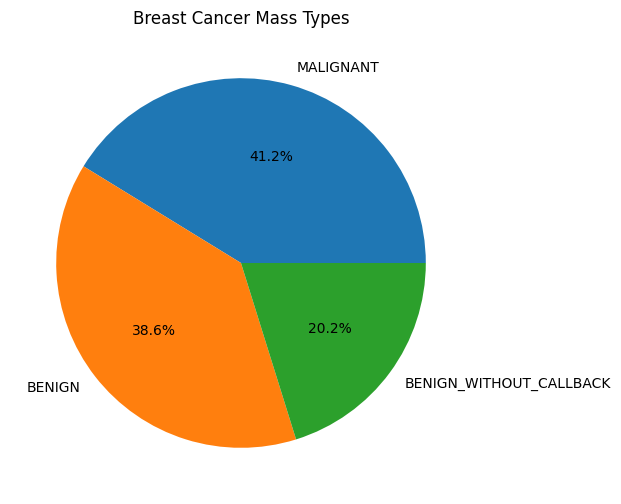

In [386]:
# pathology distributions
value = mass_train['pathology'].value_counts() + calc_train['pathology'].value_counts()
plt.figure(figsize=(8,6))

plt.pie(value, labels=value.index, autopct='%1.1f%%')
plt.title('Breast Cancer Mass Types', fontsize=12)
plt.show()

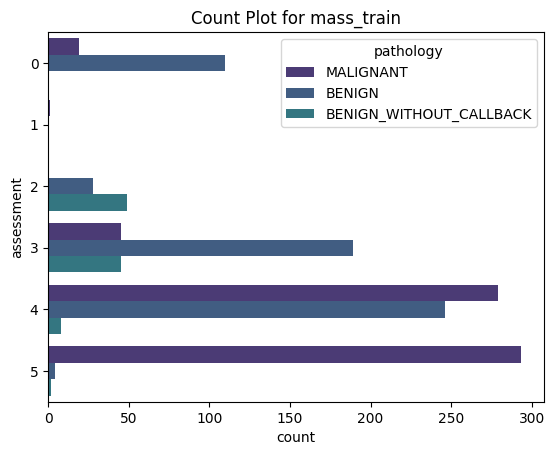

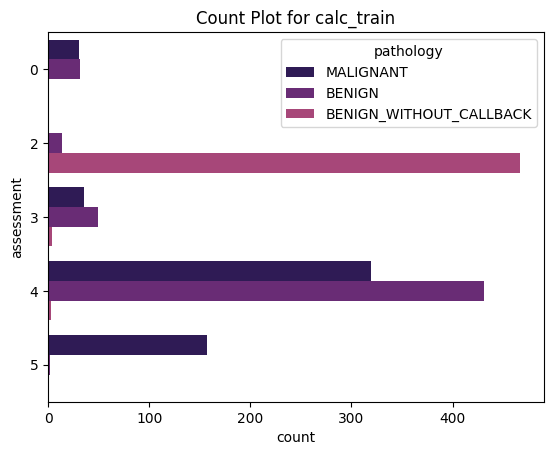

In [387]:
# Assuming mass_train and calc_train are your DataFrames

# Set the color palette for mass_train
mass_palette = sns.color_palette("viridis", n_colors=len(mass_train['assessment'].unique()))
sns.countplot(data=mass_train, y='assessment', hue='pathology', palette=mass_palette)
plt.title('Count Plot for mass_train')
plt.show()

# Set the color palette for calc_train
calc_palette = sns.color_palette("magma", n_colors=len(calc_train['assessment'].unique()))
sns.countplot(data=calc_train, y='assessment', hue='pathology', palette=calc_palette)
plt.title('Count Plot for calc_train')
plt.show()

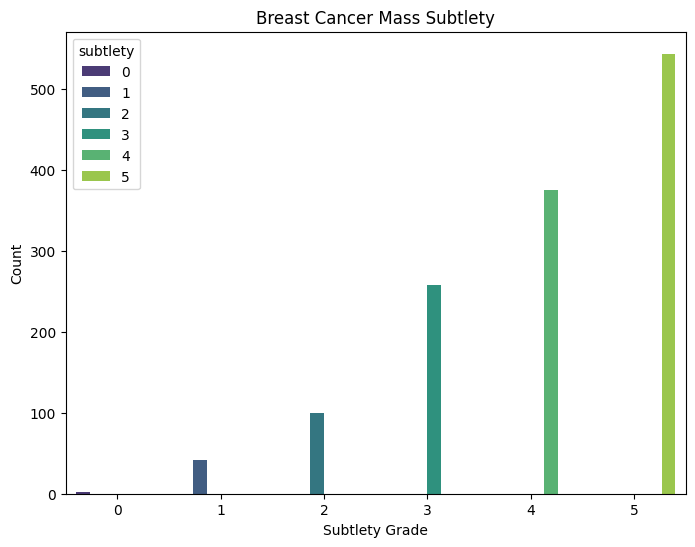

In [388]:
plt.figure(figsize=(8, 6))
sns.countplot(data=mass_train, x='subtlety', palette='viridis', hue='subtlety')
plt.title('Breast Cancer Mass Subtlety', fontsize=12)
plt.xlabel('Subtlety Grade')
plt.ylabel('Count')
plt.show()

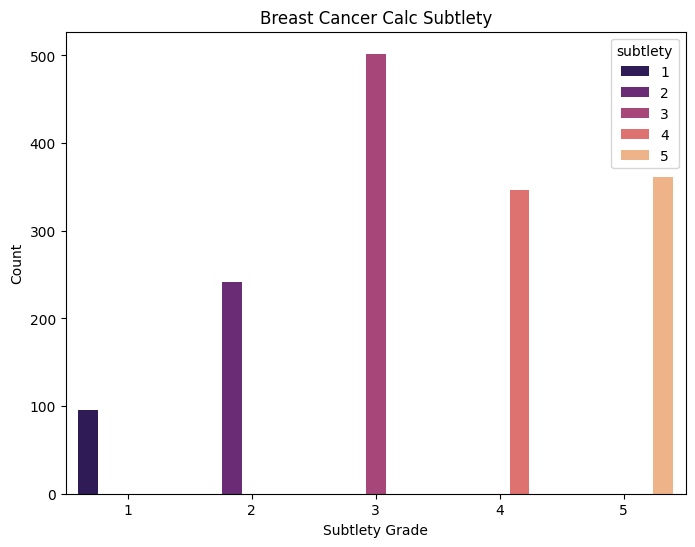

In [389]:
plt.figure(figsize=(8, 6))
sns.countplot(data=calc_train, x='subtlety', palette='magma', hue='subtlety')
plt.title('Breast Cancer Calc Subtlety', fontsize=12)
plt.xlabel('Subtlety Grade')
plt.ylabel('Count')
plt.show()

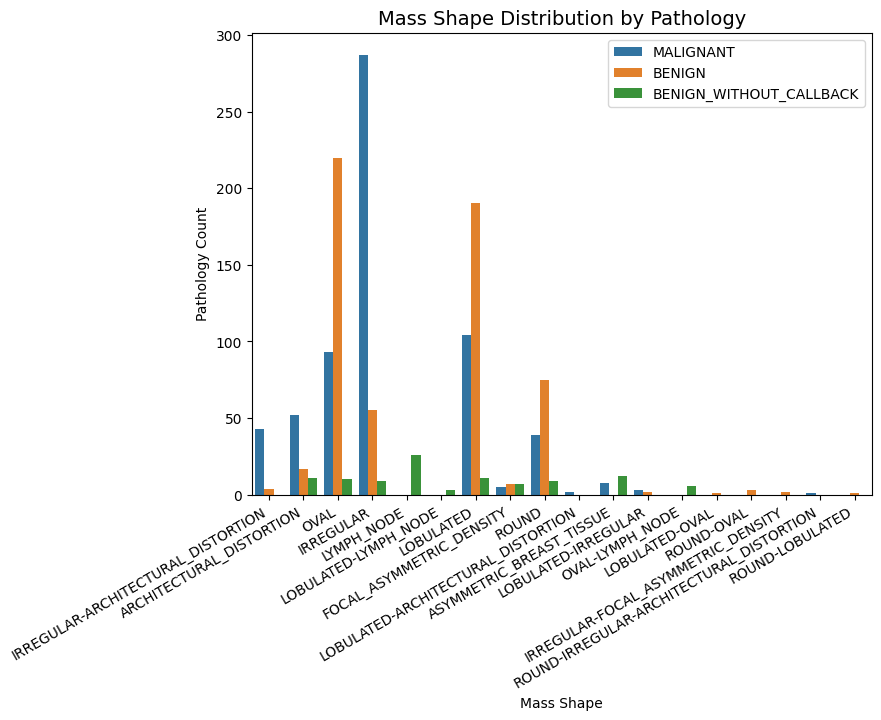

In [390]:
# view breast mass shape distribution against pathology
plt.figure(figsize=(8,6))

sns.countplot(mass_train, x='mass_shape', hue='pathology')
plt.title('Mass Shape Distribution by Pathology', fontsize=14)
plt.xlabel('Mass Shape')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Pathology Count')
plt.legend()
plt.show()

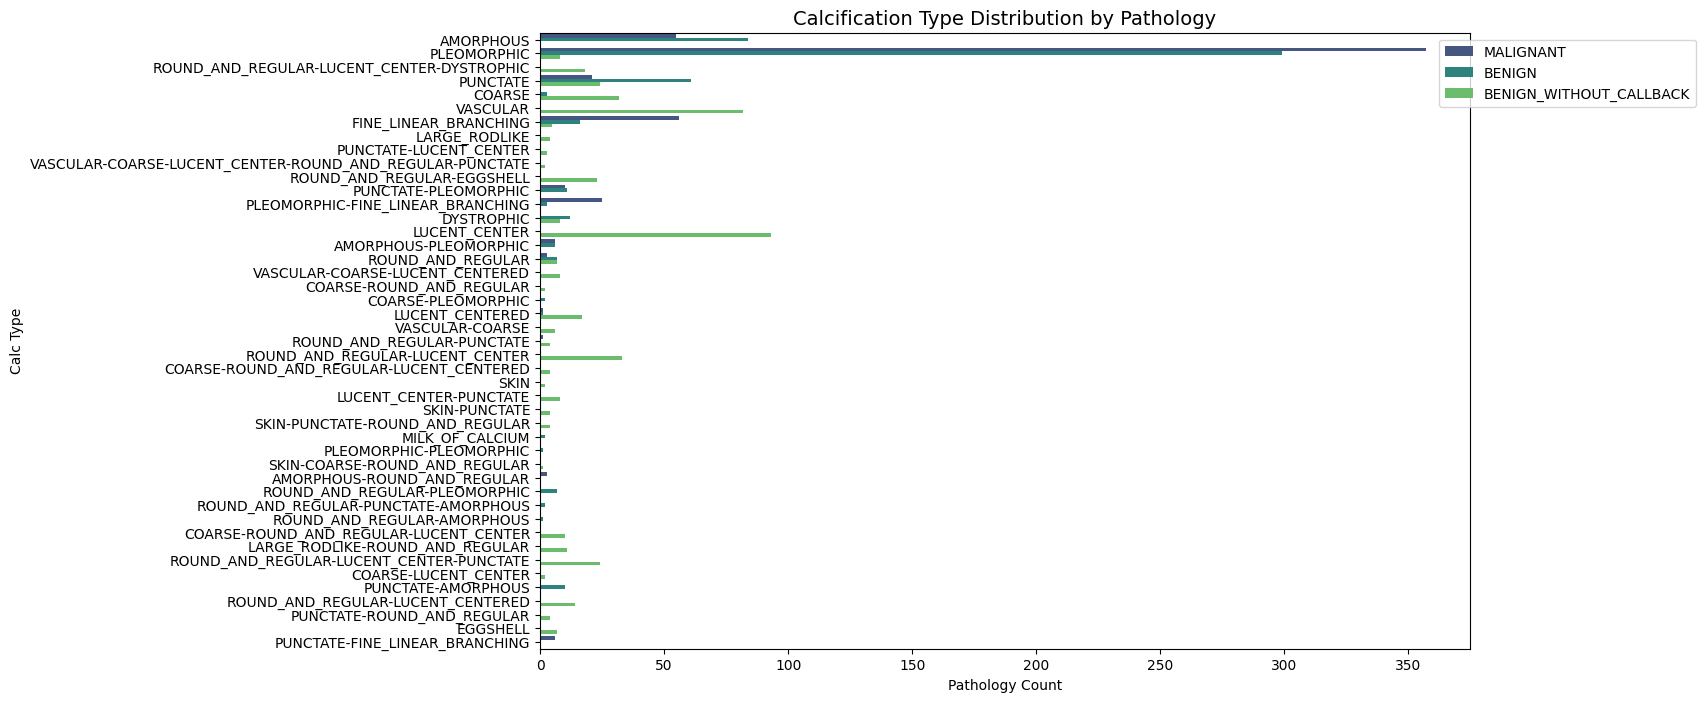

In [391]:
plt.figure(figsize=(12, 8))

sns.countplot(data=calc_train, y='calc_type', hue='pathology', palette='viridis')
plt.title('Calcification Type Distribution by Pathology', fontsize=14)
plt.xlabel('Pathology Count')
plt.ylabel('Calc Type')

# Adjust the rotation of the y-axis labels
plt.yticks(rotation=0, ha='right')

# Move the legend outside the plot for better visibility
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

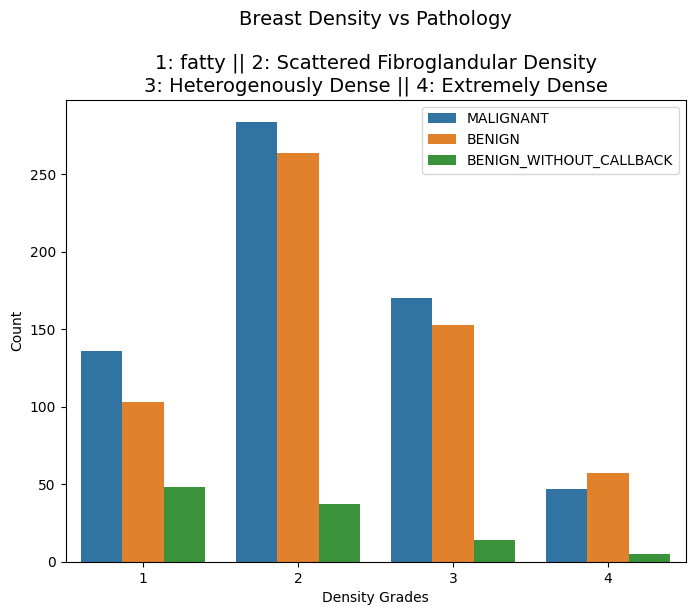

In [392]:
# breast density against pathology
plt.figure(figsize=(8,6))

sns.countplot(mass_train, x='breast_density', hue='pathology')
plt.title('Breast Density vs Pathology\n\n1: fatty || 2: Scattered Fibroglandular Density\n3: Heterogenously Dense || 4: Extremely Dense',
          fontsize=14)
plt.xlabel('Density Grades')
plt.ylabel('Count')
plt.legend()

plt.show()

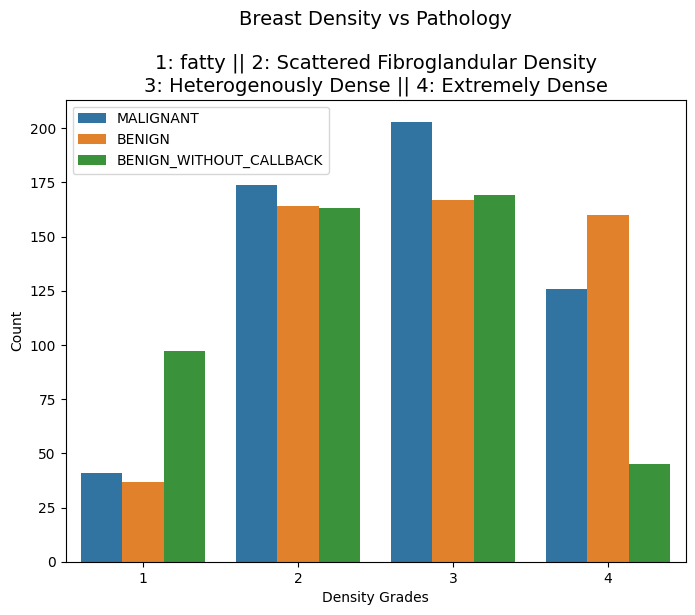

In [393]:
# breast density against pathology
plt.figure(figsize=(8,6))

sns.countplot(calc_train, x='breast_density', hue='pathology')
plt.title('Breast Density vs Pathology\n\n1: fatty || 2: Scattered Fibroglandular Density\n3: Heterogenously Dense || 4: Extremely Dense',
          fontsize=14)
plt.xlabel('Density Grades')
plt.ylabel('Count')
plt.legend()

plt.show()

In [394]:
mass_train.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3423861948112676...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3593083293123978...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.8918004621102253...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2953609263134927...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,jpeg/1.3.6.1.4.1.9590.100.1.2.4105247549130579...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...


In [395]:
calc_train.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc_type,calc_distribution,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,jpeg/1.3.6.1.4.1.9590.100.1.2.4741431601036838...,jpeg/1.3.6.1.4.1.9590.100.1.2.3933440102117190...,jpeg/1.3.6.1.4.1.9590.100.1.2.3933440102117190...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2505966083112079...,jpeg/1.3.6.1.4.1.9590.100.1.2.2962812078121304...,jpeg/1.3.6.1.4.1.9590.100.1.2.2962812078121304...
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,jpeg/1.3.6.1.4.1.9590.100.1.2.2286996273134871...,jpeg/1.3.6.1.4.1.9590.100.1.2.3141358711119438...,jpeg/1.3.6.1.4.1.9590.100.1.2.3141358711119438...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,jpeg/1.3.6.1.4.1.9590.100.1.2.1047434104111331...,jpeg/1.3.6.1.4.1.9590.100.1.2.9145827961248551...,jpeg/1.3.6.1.4.1.9590.100.1.2.9145827961248551...
4,P_00008,1,LEFT,CC,1,calcification,ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,jpeg/1.3.6.1.4.1.9590.100.1.2.4067256282138262...,jpeg/1.3.6.1.4.1.9590.100.1.2.2813974946128719...,jpeg/1.3.6.1.4.1.9590.100.1.2.2813974946128719...


Mass Training Dataset


Full Mammograms:

jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-211.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834/1-207.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540/1-250.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/1-067.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.410524754913057908920631336070876889890/1-056.jpg


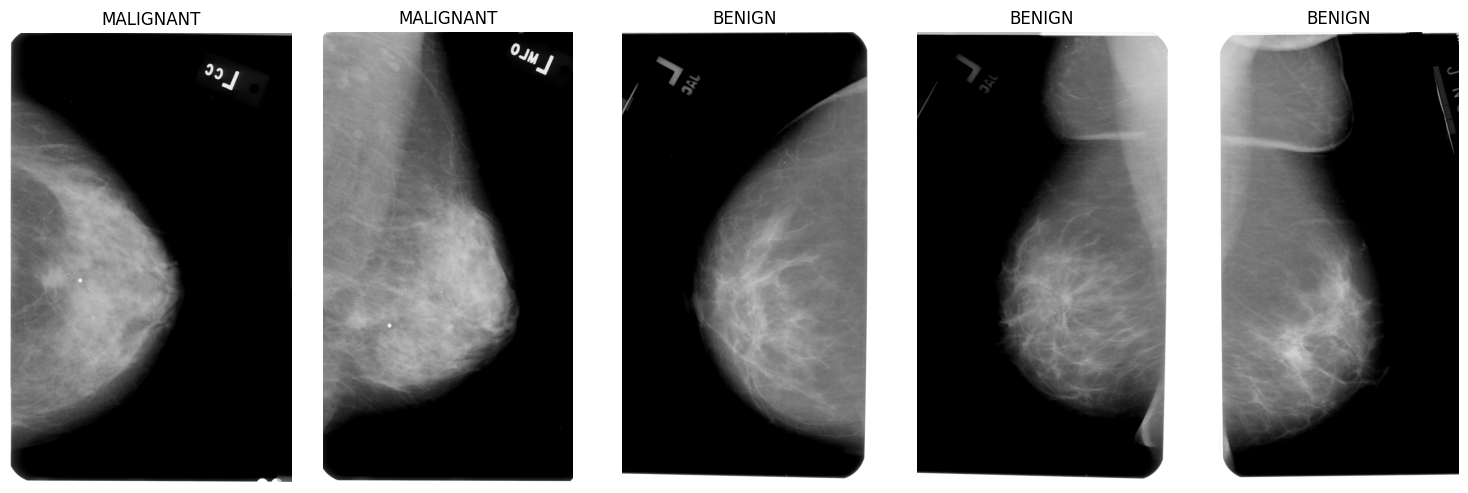

Cropped Mammograms:

jpeg/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/2-249.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/1-289.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/2-295.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/2-244.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/1-182.jpg


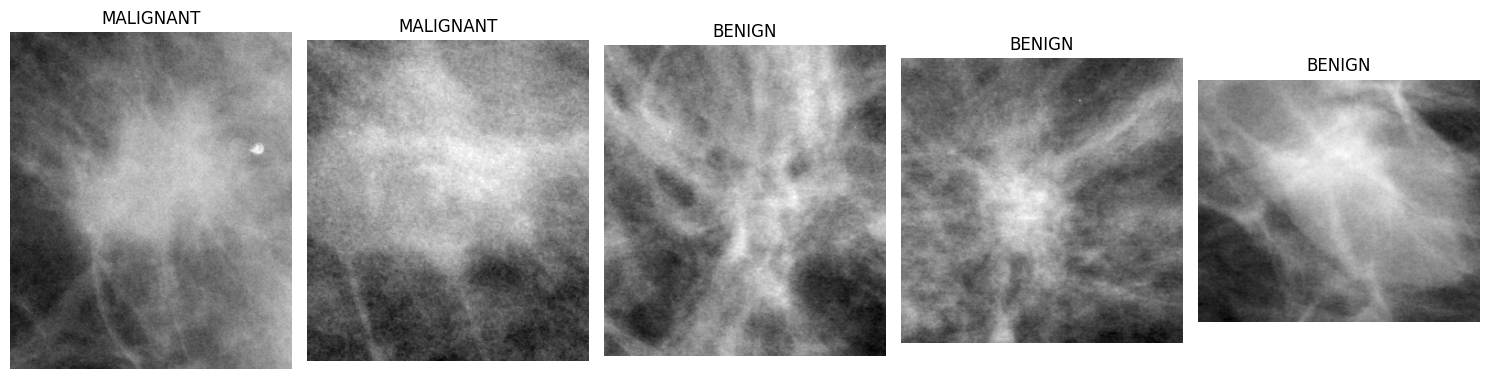

ROI Images:

jpeg/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/1-250.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/2-288.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/1-296.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/1-245.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/2-183.jpg


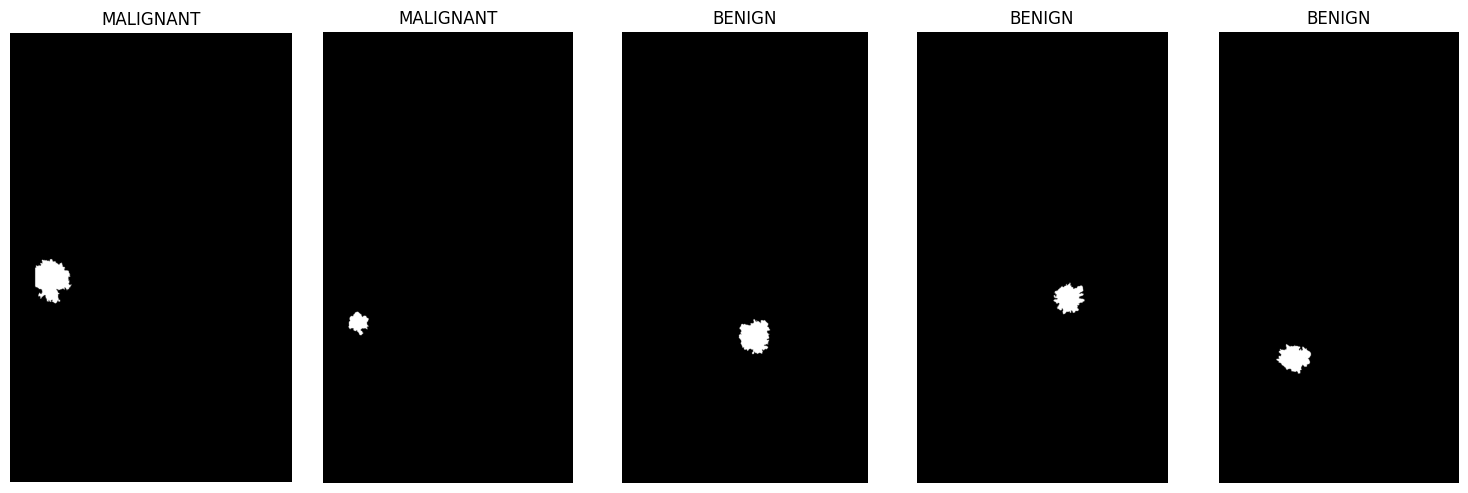

In [396]:
import matplotlib.image as mpimg

def display_images(column, number):
    """displays images in the dataset"""
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))

    # Loop through rows and display images
    for index, row in mass_train.head(number_to_visualize).iterrows():
        image_path = row[column]
        print(image_path)
        # Check if the file exists
        if os.path.exists(image_path):
            image = mpimg.imread(image_path)
            ax = axes[index]
            ax.imshow(image, cmap='gray')
            ax.set_title(f"{row['pathology']}")
            ax.axis('off')
        else:
            print(f"File not found: {image_path}")

    plt.tight_layout()
    plt.show()

print('Mass Training Dataset\n\n')
print('Full Mammograms:\n')
display_images('image_file_path', 5)
print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)
print('ROI Images:\n')
display_images('ROI_mask_file_path', 5)

Calcification Trianing Dataset


Full Mammograms:

jpeg/1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548/1-188.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.250596608311207922527805669693579696727/1-189.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.228699627313487111012474405462022068297/1-190.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.104743410411133110629448544090466900446/1-191.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.406725628213826290127343763811145520834/1-192.jpg


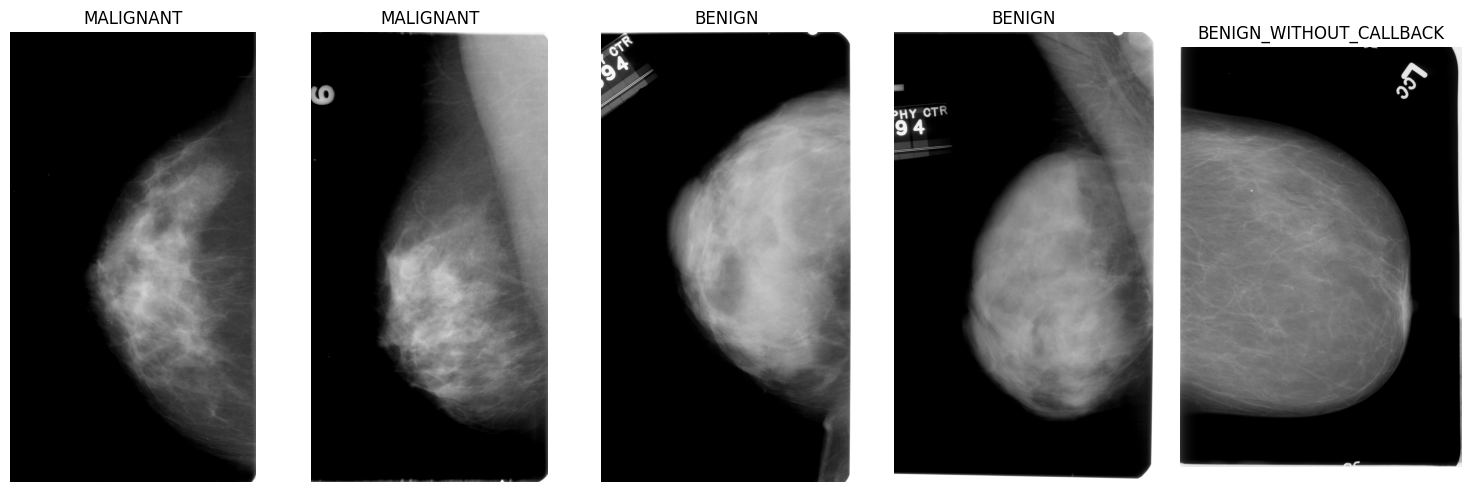

Cropped Mammograms:

jpeg/1.3.6.1.4.1.9590.100.1.2.393344010211719049419601138200355094682/2-191.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.296281207812130400303493285473798422894/1-192.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.314135871111943890422150247820137952041/1-193.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.91458279612485515203413781822560852485/1-194.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.281397494612871934937455783843630775495/1-195.jpg


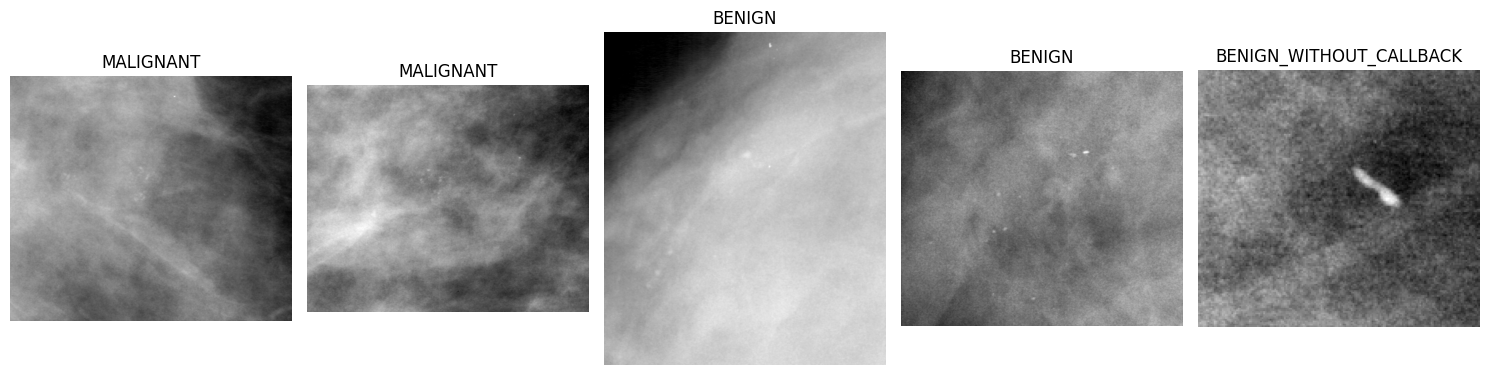

ROI Images:

jpeg/1.3.6.1.4.1.9590.100.1.2.393344010211719049419601138200355094682/1-107.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.296281207812130400303493285473798422894/2-108.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.314135871111943890422150247820137952041/2-109.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.91458279612485515203413781822560852485/2-110.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.281397494612871934937455783843630775495/2-111.jpg


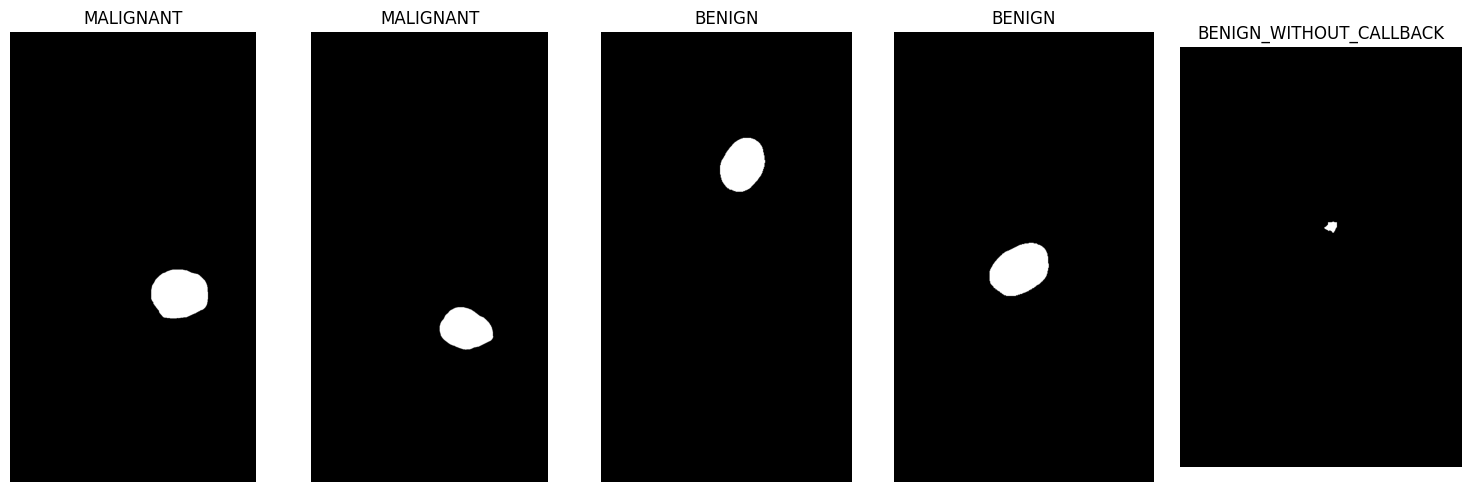

In [397]:
def display_images(column, number):
    """displays images in the dataset"""
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))

    # Loop through rows and display images
    for index, row in calc_train.head(number_to_visualize).iterrows():
        image_path = row[column]
        print(image_path)
        # Check if the file exists
        if os.path.exists(image_path):
            image = mpimg.imread(image_path)
            ax = axes[index]
            ax.imshow(image, cmap='gray')
            ax.set_title(f"{row['pathology']}")
            ax.axis('off')
        else:
            print(f"File not found: {image_path}")

    plt.tight_layout()
    plt.show()


print('Calcification Trianing Dataset\n\n')
print('Full Mammograms:\n')
display_images('image_file_path', 5)
print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)
print('ROI Images:\n')
display_images('ROI_mask_file_path', 5)

In [398]:
# Merge datasets
mass_calc = pd.concat([mass_train, mass_test, calc_train, calc_test], axis=0)

# Define the target size
target_size = (224, 224, 3)

In [399]:
mass_calc

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,calc_type,calc_distribution
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3423861948112676...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...,NaN,NaN
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3593083293123978...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...,NaN,NaN
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.8918004621102253...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...,NaN,NaN
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2953609263134927...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...,NaN,NaN
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,jpeg/1.3.6.1.4.1.9590.100.1.2.4105247549130579...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,P_02464,2,RIGHT,MLO,1,calcification,NaN,NaN,0,MALIGNANT,4,Calc-Test_P_02464_RIGHT_MLO/1.3.6.1.4.1.9590.1...,jpeg/1.3.6.1.4.1.9590.100.1.2.5261986311117530...,Calc-Test_P_02464_RIGHT_MLO_1/1.3.6.1.4.1.9590...,FINE_LINEAR_BRANCHING,CLUSTERED
322,P_02498,4,RIGHT,CC,1,calcification,NaN,NaN,0,BENIGN,3,Calc-Test_P_02498_RIGHT_CC/1.3.6.1.4.1.9590.10...,jpeg/1.3.6.1.4.1.9590.100.1.2.3552866718105156...,Calc-Test_P_02498_RIGHT_CC_1/1.3.6.1.4.1.9590....,PUNCTATE,CLUSTERED
323,P_02498,4,RIGHT,MLO,1,calcification,NaN,NaN,0,BENIGN,3,Calc-Test_P_02498_RIGHT_MLO/1.3.6.1.4.1.9590.1...,jpeg/1.3.6.1.4.1.9590.100.1.2.3662165906113067...,Calc-Test_P_02498_RIGHT_MLO_1/1.3.6.1.4.1.9590...,PUNCTATE,CLUSTERED
324,P_02501,3,RIGHT,CC,1,calcification,NaN,NaN,0,MALIGNANT,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2323085359106578...,jpeg/1.3.6.1.4.1.9590.100.1.2.2759237044115310...,Calc-Test_P_02501_RIGHT_CC_1/1.3.6.1.4.1.9590....,PLEOMORPHIC,CLUSTERED


##### IV. Image Preprocessing

In [400]:
"""def apply_gaussian_filter(image, sigma=1.0):
    Apply Gaussian filter to the image
    return cv2.GaussianBlur(image, (0, 0), sigma)"""

'def apply_gaussian_filter(image, sigma=1.0):\n    Apply Gaussian filter to the image\n    return cv2.GaussianBlur(image, (0, 0), sigma)'

In [401]:
"""def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    Apply CLAHE to enhance image contrast.
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    lab_planes = list(cv2.split(lab))  # Convert to list

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    lab_planes[0] = clahe.apply(lab_planes[0])

    lab = cv2.merge(lab_planes)
    return cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)"""

'def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):\n    Apply CLAHE to enhance image contrast.\n    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)\n    lab_planes = list(cv2.split(lab))  # Convert to list\n\n    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)\n    lab_planes[0] = clahe.apply(lab_planes[0])\n\n    lab = cv2.merge(lab_planes)\n    return cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)'

In [402]:
# def image_processor(image_path, target_size, base_directory="/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg"):
#    """Preprocess images for Inception V3 model with Gaussian filter and CLAHE"""
#    absolute_image_path = os.path.abspath(image_path)

    # Counter for skipped and processed images
#    skipped_count = 0
#    processed_count = 0

    # Check if the image path starts with the specified directory
#    if not absolute_image_path.startswith(base_directory):
#        skipped_count += 1
#        return None, skipped_count, processed_count

#    image = cv2.imread(absolute_image_path)
#    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply Gaussian filter
    # image = apply_gaussian_filter(image, sigma=1.0)

    # Resize the image
#    image = cv2.resize(image, (target_size[1], target_size[0]))

    # Apply CLAHE
    # image = apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8))

    # Normalize pixel values to be in the range [0, 1]
#    image_array = image / 255.0

#    processed_count += 1

#    return image_array, skipped_count, processed_count

In [ ]:
def image_processor(image_path, target_size):
    """Preprocess images for Inception V3 model with Gaussian filter and CLAHE"""

    # Check if a GPU is available
    physical_devices = tf.config.list_physical_devices('GPU')
    if len(physical_devices) == 0:
        print("Warning: No GPU devices found. Using CPU.")
    else:
        # print("GPU found. Using GPU for image processing.")
        tf.config.experimental.set_memory_growth(physical_devices[0], True)

    absolute_image_path = os.path.abspath(image_path)

    # Counter for skipped and processed images
    skipped_count = 0
    processed_count = 0

    # Check if the image path starts with the specified directory
    if not image_path.startswith("jpeg"):
        print(f"Warning: Image path {image_path} does not start with the specified base directory.")
        skipped_count += 1
        return None, skipped_count, processed_count

    # Read the image using TensorFlow for GPU acceleration
    image = tf.io.read_file(absolute_image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)

    # Resize the image
    image = tf.image.resize(image, (target_size[0], target_size[1]))

    # Normalize pixel values to be in the range [0, 1]
    image_array = image.numpy()

    processed_count += 1

    return image_array, skipped_count, processed_count

In [409]:
# Example usage with target_size for both 'image_file_path' and 'cropped_image_file_path'
target_size = (224, 224, 3)  # Set your desired target size

In [413]:
# Apply preprocessor to train data
result = mass_calc['image_file_path'].apply(lambda x: pd.Series(image_processor(x, target_size), index=['image_array', 'skipped_count', 'processed_count']))

# Extract processed images, skipped count, and processed count from the result
mass_calc[['processed_images', 'skipped_count', 'processed_count']] = result

# Filter out rows where processed_images is None
mass_calc = mass_calc.dropna(subset=['processed_images'])

mass_calc

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,calc_type,calc_distribution,processed_images,skipped_count,processed_count
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3423861948112676...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...,NaN,NaN,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",0.0,1.0
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3593083293123978...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...,NaN,NaN,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",0.0,1.0
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.8918004621102253...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...,NaN,NaN,"[[[0.9520922, 0.9520922, 0.9520922], [0.952092...",0.0,1.0
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2953609263134927...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...,NaN,NaN,"[[[0.7408911, 0.7408911, 0.7408911], [0.745500...",0.0,1.0
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,jpeg/1.3.6.1.4.1.9590.100.1.2.4105247549130579...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...,NaN,NaN,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,P_01861,4,LEFT,MLO,1,calcification,NaN,NaN,4,MALIGNANT,2,jpeg/1.3.6.1.4.1.9590.100.1.2.2853835682123655...,jpeg/1.3.6.1.4.1.9590.100.1.2.2386933085126199...,Calc-Test_P_01861_LEFT_MLO_1/1.3.6.1.4.1.9590....,PUNCTATE,CLUSTERED,"[[[0.90884984, 0.90884984, 0.90884984], [0.904...",0.0,1.0
296,P_01882,2,LEFT,CC,1,calcification,NaN,NaN,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.1892437603113549...,jpeg/1.3.6.1.4.1.9590.100.1.2.3979168968116602...,Calc-Test_P_01882_LEFT_CC_1/1.3.6.1.4.1.9590.1...,PLEOMORPHIC,CLUSTERED,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",0.0,1.0
297,P_01882,2,LEFT,MLO,1,calcification,NaN,NaN,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.1819498688130363...,jpeg/1.3.6.1.4.1.9590.100.1.2.5832213741248539...,Calc-Test_P_01882_LEFT_MLO_1/1.3.6.1.4.1.9590....,PLEOMORPHIC,CLUSTERED,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",0.0,1.0
314,P_02418,3,RIGHT,CC,1,calcification,NaN,NaN,3,MALIGNANT,2,jpeg/1.3.6.1.4.1.9590.100.1.2.2669881550124700...,jpeg/1.3.6.1.4.1.9590.100.1.2.3706466502131916...,Calc-Test_P_02418_RIGHT_CC_1/1.3.6.1.4.1.9590....,FINE_LINEAR_BRANCHING,LINEAR,"[[[0.033683475, 0.033683475, 0.033683475], [0....",0.0,1.0


In [414]:
# Convert the processed_images column to an array
X_resized = np.array(mass_calc['processed_images'].tolist())

# Create a binary mapper
class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0}

# Apply class mapper to pathology column
mass_calc['labels'] = mass_calc['pathology'].replace(class_mapper)

# Check the number of classes
num_classes = len(mass_calc['labels'].unique())

In [415]:
num_classes

2

In [ ]:
# Apply preprocessor to cropped data
# result_cropped = mass_calc['cropped_image_file_path'].apply(lambda x: pd.Series(image_processor(x, target_size), index=['cropped_image_array', 'cropped_skipped_count', 'cropped_processed_count']))

In [ ]:
# Extract processed cropped images, skipped count, and processed count from the result
# mass_calc[['processed_cropped_images', 'cropped_skipped_count', 'cropped_processed_count']] = result_cropped

# Filter out rows where processed_cropped_images is None
# mass_calc = mass_calc.dropna(subset=['processed_cropped_images'])

In [ ]:
# Convert the processed_cropped_images column to an array
# X_resized_cropped = np.array(mass_calc['processed_cropped_images'].tolist())

# Combine the processed images from both columns if needed
# X_combined = np.concatenate([X_resized, X_resized_cropped], axis=???)

In [ ]:
# Create a binary mapper for the labels if not already created
# class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0}

# Apply class mapper to pathology column if not already applied
# mass_calc['labels'] = mass_calc['pathology'].replace(class_mapper)

# Check the number of classes
# num_classes = len(mass_calc['labels'].unique())

In [416]:
skipped_sum = mass_calc['skipped_count'].sum() 
#+ mass_calc['cropped_skipped_count'].sum()
print(f"Total skipped count: {skipped_sum}")

processed_count = mass_calc['processed_count'].sum() 
#+ mass_calc['cropped_processed_count'].sum()
print(f"Total processed count: {processed_count}")

Total skipped count: 0.0
Total processed count: 3286.0


In [ ]:
# mass_calc['cropped_processed_count'].sum()

In [ ]:
# Apply preprocessor to train data
# mass_calc[['processed_images', 'skipped_count', 'processed_count']] = mass_calc['image_file_path'].apply(
    # lambda x: pd.Series(image_processor(x, target_size), index=['image_array', 'skipped_count', 'processed_count']))

# Create a binary mapper
# class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0}

In [ ]:
# Apply preprocessor to train data
# mass_calc['processed_images'] = mass_calc['image_file_path'].apply(lambda x: image_processor(x, target_size))

# Create a binary mapper
# class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0}

In [417]:
mass_calc

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,calc_type,calc_distribution,processed_images,skipped_count,processed_count,labels
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3423861948112676...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...,NaN,NaN,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",0.0,1.0,1
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3593083293123978...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...,NaN,NaN,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",0.0,1.0,1
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.8918004621102253...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...,NaN,NaN,"[[[0.9520922, 0.9520922, 0.9520922], [0.952092...",0.0,1.0,0
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2953609263134927...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...,NaN,NaN,"[[[0.7408911, 0.7408911, 0.7408911], [0.745500...",0.0,1.0,0
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,jpeg/1.3.6.1.4.1.9590.100.1.2.4105247549130579...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...,NaN,NaN,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,P_01861,4,LEFT,MLO,1,calcification,NaN,NaN,4,MALIGNANT,2,jpeg/1.3.6.1.4.1.9590.100.1.2.2853835682123655...,jpeg/1.3.6.1.4.1.9590.100.1.2.2386933085126199...,Calc-Test_P_01861_LEFT_MLO_1/1.3.6.1.4.1.9590....,PUNCTATE,CLUSTERED,"[[[0.90884984, 0.90884984, 0.90884984], [0.904...",0.0,1.0,1
296,P_01882,2,LEFT,CC,1,calcification,NaN,NaN,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.1892437603113549...,jpeg/1.3.6.1.4.1.9590.100.1.2.3979168968116602...,Calc-Test_P_01882_LEFT_CC_1/1.3.6.1.4.1.9590.1...,PLEOMORPHIC,CLUSTERED,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",0.0,1.0,0
297,P_01882,2,LEFT,MLO,1,calcification,NaN,NaN,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.1819498688130363...,jpeg/1.3.6.1.4.1.9590.100.1.2.5832213741248539...,Calc-Test_P_01882_LEFT_MLO_1/1.3.6.1.4.1.9590....,PLEOMORPHIC,CLUSTERED,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",0.0,1.0,0
314,P_02418,3,RIGHT,CC,1,calcification,NaN,NaN,3,MALIGNANT,2,jpeg/1.3.6.1.4.1.9590.100.1.2.2669881550124700...,jpeg/1.3.6.1.4.1.9590.100.1.2.3706466502131916...,Calc-Test_P_02418_RIGHT_CC_1/1.3.6.1.4.1.9590....,FINE_LINEAR_BRANCHING,LINEAR,"[[[0.033683475, 0.033683475, 0.033683475], [0....",0.0,1.0,1


In [ ]:
# Assuming your DataFrame is named 'your_dataframe'
# Replace 'your_generated_data.csv' with the desired file name
# mass_calc.to_csv('mass_calc.csv', index=False)

In [ ]:
# from IPython.display import FileLink
# Generate a download link
# FileLink('mass_calc.csv')

In [ ]:
# Convert the processed_images column to an array
# X_resized = np.array(mass_calc['processed_images'].tolist())

# Apply class mapper to pathology column
# mass_calc['labels'] = mass_calc['pathology'].replace(class_mapper)

# Check the number of classes
# num_classes = len(mass_calc['labels'].unique())

In [418]:
print('Number of Classes:', num_classes)

Number of Classes: 2


In [419]:
mass_calc.shape

(3286, 20)

##### V. Data Split for Train, Test and Validation

In [420]:
unique_labels_count = mass_calc['labels'].nunique()
print("Total number of unique labels:", unique_labels_count)

Total number of unique labels: 2


In [421]:
filled_labels_count = mass_calc['labels'].count()

print("Total number of filled labels:", filled_labels_count)

Total number of filled labels: 3286


In [422]:
print(len(X_resized))
print(len(mass_calc['labels'].values))

3286
3286


In [423]:
mass_calc = mass_calc.dropna(subset=['labels'])

In [424]:
print(len(X_resized))
print(len(mass_calc['labels'].values))

3286
3286


In [425]:
# Assuming mass_calc is your DataFrame and 'labels' is the column of interest
mass_calc = mass_calc.dropna(subset=['labels'])

In [426]:
# Assuming X_resized is a NumPy array
# Remove corresponding rows from X_resized
X_resized = X_resized[mass_calc.index]

In [427]:
print(len(X_resized))
print(len(mass_calc['labels'].values))

3286
3286


In [428]:
# Split data into train, test, and validation sets (70, 20, 10)
X_train, X_temp, y_train, y_temp = train_test_split(X_resized, mass_calc['labels'].values, test_size=0.2, random_state=42)

In [429]:
# Split data into train, test, and validation sets (70, 20, 10)
# X_train, X_temp, y_train, y_temp = train_test_split(X_resized, mass_calc['labels'].values, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Convert integer labels to one-hot encoded labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

In [430]:
# Number of images in each set
num_train_images = X_train.shape[0]
num_test_images = X_test.shape[0]
num_val_images = X_val.shape[0]

print("Number of images in the training set:", num_train_images)
print("Number of images in the testing set:", num_test_images)
print("Number of images in the validation set:", num_val_images)

Number of images in the training set: 2628
Number of images in the testing set: 526
Number of images in the validation set: 132


##### VI. Data Augmentation

In [ ]:
# Create an ImageDataGenerator for each type of augmentation
generators = []
augmentation_configs = [
    dict(rotation_range=30),
    dict(horizontal_flip=True, vertical_flip=True),
    # Add more configurations as needed
]

# Create generators for each configuration
for config in augmentation_configs:
    generator = ImageDataGenerator(**config)
    generators.append(generator)

# Add the original data generator
generators.append(ImageDataGenerator())

In [ ]:
# Combine the original data with augmented data
combined_generator = zip(*[gen.flow(X_train, y_train, batch_size=12) for gen in generators])

In [ ]:
# Data_augmentation
train_datagen = ImageDataGenerator(rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='constant')

In [ ]:
# Apply augmentation to training data
train_data_augmented = train_datagen.flow(X_train, y_train, batch_size=32)

In [ ]:
# batch_size = 32
# total_images_before_augmentation = 2628

# Calculate the total number of batches generated
# total_batches = total_images_before_augmentation / batch_size

# Calculate the total number of images after augmentation
# total_images_after_augmentation = total_batches * batch_size

# print("Total images after augmentation:", total_images_after_augmentation)

##### VII. DenseNet 169

In [ ]:
# Create the DenseNet 169 base model
base_model = DenseNet169(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x) Keeping the dropouts I didn't get good accuracy
predictions = Dense(2, activation='softmax')(x)
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

51877672/51877672 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']      

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model using each batch from the combined generator
epochs = 5  # Adjust as needed
steps_per_epoch = len(X_train) // 12  # Adjust batch size as needed
steps_per_epoch

219

In [ ]:
# Check the output shape of your model
print(model.output_shape)

(None, 2)


In [ ]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
   monitor='val_accuracy',  # Monitor validation accuracy
   patience=5,  # Number of epochs with no improvement after which training will be stopped
   min_delta=0.00001,  # Minimum change in the monitored quantity to qualify as an improvement
   mode='max',  # 'max' if the quantity monitored should be increasing, 'min' if decreasing
   verbose=1  # Print a message when training is stopped due to early stopping
)

In [ ]:
# Continue from where you left off in the previous code
for epoch in range(epochs):
    for step in range(steps_per_epoch):
        batch_data = next(combined_generator)
        # Unpack the batch_data
        X_batches, y_batches = zip(*batch_data)

        # Concatenate the batches along the batch axis
        X_batch = np.concatenate(X_batches, axis=0)
        y_batch = np.concatenate(y_batches, axis=0)

        # Assuming you have a model created and compiled
        # Replace `your_model` with the actual name of your model
        history = model.fit(X_batch, y_batch, validation_data=(X_val, y_val),steps_per_epoch=len(X_batch),validation_steps=len(X_val), epochs=1, callbacks=[early_stopping],batch_size=12, verbose=2)

    # Evaluate the model or perform other tasks at the end of each epoch
    # For example, you can print validation metrics or save the model weights
    # Replace `your_validation_data` and `your_validation_labels` with actual validation data
    # val_loss, val_accuracy = your_model.evaluate(your_validation_data, your_validation_labels)
    # print(f'Epoch {epoch + 1}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

# After training, you may want to save the model or perform other tasks
# Replace `your_model.save` with the actual method for saving your model
# your_model.save('your_model.h5')

36/36 - 20s - loss: 0.7850 - accuracy: 0.6111 - val_loss: 0.6848 - val_accuracy: 0.6136 - 20s/epoch - 561ms/step
36/36 - 1s - loss: 0.8629 - accuracy: 0.3611 - val_loss: 0.6887 - val_accuracy: 0.6288 - 800ms/epoch - 22ms/step
36/36 - 1s - loss: 0.8803 - accuracy: 0.4722 - val_loss: 0.6861 - val_accuracy: 0.6288 - 797ms/epoch - 22ms/step
36/36 - 1s - loss: 0.6366 - accuracy: 0.6667 - val_loss: 0.6818 - val_accuracy: 0.5909 - 769ms/epoch - 21ms/step
36/36 - 1s - loss: 0.6927 - accuracy: 0.6389 - val_loss: 0.6813 - val_accuracy: 0.6061 - 789ms/epoch - 22ms/step
36/36 - 1s - loss: 0.6193 - accuracy: 0.6389 - val_loss: 0.6782 - val_accuracy: 0.5985 - 782ms/epoch - 22ms/step
36/36 - 1s - loss: 0.7263 - accuracy: 0.5556 - val_loss: 0.7006 - val_accuracy: 0.6288 - 810ms/epoch - 22ms/step
36/36 - 1s - loss: 0.7275 - accuracy: 0.5278 - val_loss: 0.6715 - val_accuracy: 0.5606 - 789ms/epoch - 22ms/step
36/36 - 1s - loss: 0.6419 - accuracy: 0.6667 - val_loss: 0.6834 - val_accuracy: 0.5227 - 756ms/e

In [ ]:
# Continue with the rest of the code
# history = model.fit(
#    train_data_augmented,
#    epochs=500,
#    validation_data=(X_val, y_val),
#    steps_per_epoch=len(X_train) // 32,
#    validation_steps=len(X_val),
#    callbacks=[early_stopping]  # Add the EarlyStopping callback
#)

In [ ]:
# Calculate the total number of iterations
iterations = 4*5*len(X_train)//12 # Assuming 200 epochs and batch size of 32
print(f'Total number of iterations: {iterations}')

Total number of iterations: 4380


In [ ]:
# Assuming train_data_augmented is a data generator
# history = model.fit(
#    train_data_augmented,
#    epochs=200,
#    validation_data=(X_val, y_val),
#    steps_per_epoch=len(train_data_augmented),
#    validation_steps=len(X_val),
#    callbacks=[early_stopping]  # Add the EarlyStopping callback
#)

# Calculate the total number of iterations
# iterations = 60 * len(train_data_augmented)
# print(f'Total number of iterations: {iterations}') 

##### IV. Results

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [ ]:
def evaluate_model(model, X_data, y_data, dataset_type):
    y_pred = model.predict(X_data)

    # Convert predictions to binary (0 or 1)
    y_pred_binary = np.argmax(y_pred, axis=1)
    y_true_binary = np.argmax(y_data, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_true_binary, y_pred_binary)
    recall = recall_score(y_true_binary, y_pred_binary)
    precision = precision_score(y_true_binary, y_pred_binary)
    f1 = f1_score(y_true_binary, y_pred_binary)
    confusion_mat = confusion_matrix(y_true_binary, y_pred_binary)
    print(f"{dataset_type} Accuracy: {accuracy:.4f}")
    print(f"{dataset_type} Recall: {recall:.4f}")
    print(f"{dataset_type} Precision: {precision:.4f}")
    print(f"{dataset_type} F1 Score: {f1:.4f}")
    print(f"{dataset_type} Confusion Matrix:\n{confusion_mat}\n")

    # Plot confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["BENIGN", "MALIGNANT"], yticklabels=["BENIGN", "MALIGNANT"])
    plt.title(f"{dataset_type} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

83/83 [==============================] - 12s 84ms/step
Train Accuracy: 0.6332
Train Recall: 0.1710
Train Precision: 0.7188
Train F1 Score: 0.2763
Train Confusion Matrix:
[[1480   72]
 [ 892  184]]



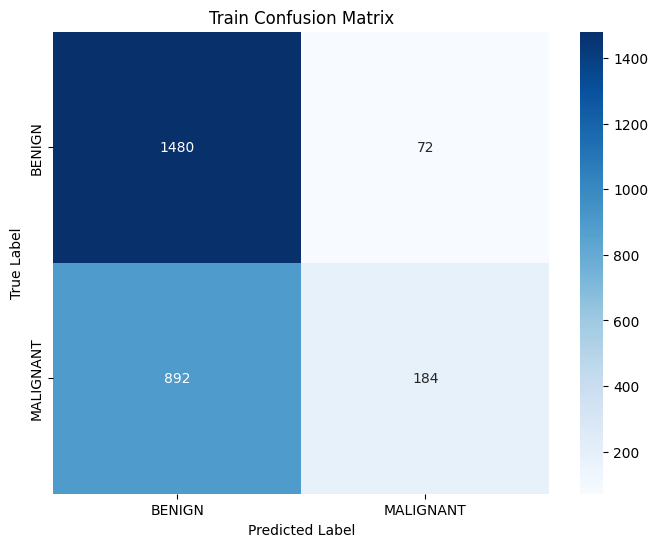

In [ ]:
evaluate_model(model, X_train, y_train, "Train")

17/17 [==============================] - 3s 171ms/step
Test Accuracy: 0.5722
Test Recall: 0.1053
Test Precision: 0.5333
Test F1 Score: 0.1758
Test Confusion Matrix:
[[277  21]
 [204  24]]



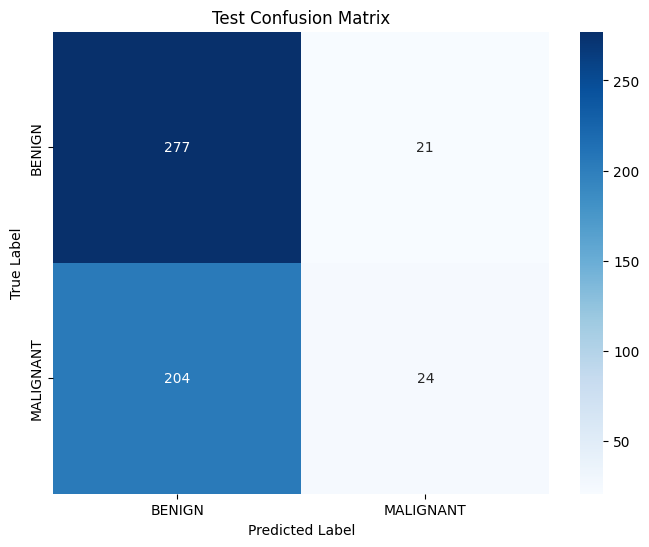

In [ ]:
evaluate_model(model, X_test, y_test, "Test")

5/5 [==============================] - 0s 66ms/step
Validation Accuracy: 0.6061
Validation Recall: 0.0784
Validation Precision: 0.4444
Validation F1 Score: 0.1333
Validation Confusion Matrix:
[[76  5]
 [47  4]]



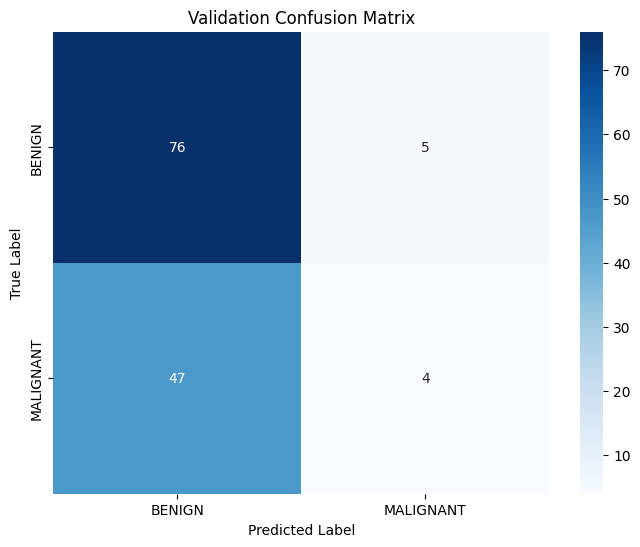

In [ ]:
evaluate_model(model, X_val, y_val, "Validation")

17/17 [==============================] - 1s 66ms/step


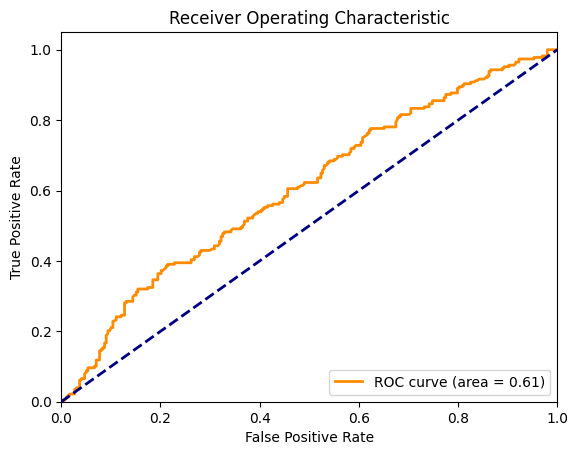

AUC: 0.61


In [ ]:
from sklearn.metrics import roc_curve, auc

# Use the trained model to predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f'AUC: {roc_auc:.2f}')

In [ ]:
history_dict = history.history

In [ ]:
# plot training loss vs validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)

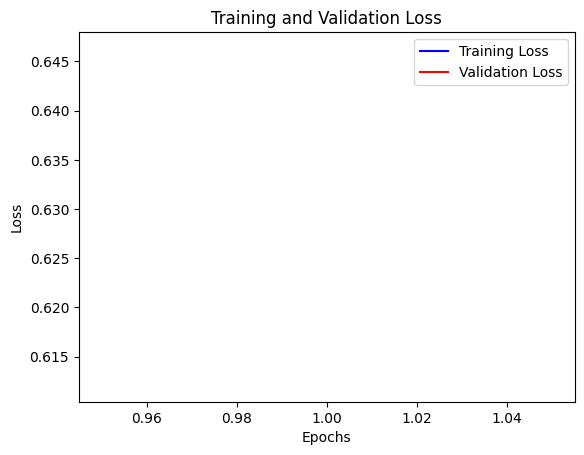

In [ ]:
plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

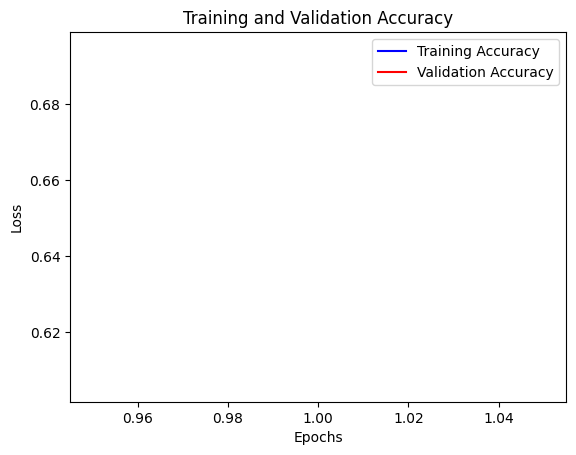

In [ ]:
# plot training vs validation accuracy
val_acc_values = history_dict['val_accuracy']
acc = history_dict['accuracy']

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()